**DARKNET NETWORK TRAFFIC ANALYSIS**

---



Darknet traffic classification is significantly important to categorize real-time applications. Analyzing darknet traffic helps in early monitoring of malware before onslaught and detection of malicious activities after outbreak.

In this dataset, a two-layered approach is used to generate benign and darknet traffic at the first layer. The darknet traffic constitutes Audio-Stream, Browsing, Chat, Email, P2P, Transfer, Video-Stream and VOIP which is generated at the second layer.
and combined with the respective VPN and Tor traffic in corresponding Darknet categories.

**LABEL2**

---


**Traffic** **Category**     	Applications used

---


**Audio**-**Stream**	        Vimeo and Youtube

---


**Browsing**	            Firefox and Chrome

---


**Chat**	                ICQ, AIM, Skype, Facebook and Hangouts

---


**Email**	                SMTPS, POP3S and IMAPS

---


**P2P**                 	uTorrent and Transmission (BitTorrent)

---


**Transfer**	            Skype, FTP over SSH (SFTP) and FTP over SSL (FTPS)  
                          using Filezilla and an external service

---


**Video**-**Stream**           Vimeo and Youtube

---


**VOIP**	                Facebook, Skype and Hangouts voice calls

---



ATTRIBUTES




1.   Flow Id
2.   Src Ip
3.   Src Port
4.   Dst IP
5.   Dst Port
6.   Protocol
7.   Timestamp
8.   Flow Duration
9.   Total Fwd Packet
10.  Total Bwd packets
11.  Active Mean
...........
77.  Active Std
78.  Active Max
79.  Active Min
80.  Idle Mean
81.  Idle Std
82.  Idle Max
83.  Idle Min
84.  Label
85.  Label.1







The first step in network traffic analysis is to import the CSV files into a data frame. And, importing essential libraries

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

Now we will load the dataset to process

In [65]:
df=pd.read_csv('Darknet.csv')

In [66]:
df.head()

,Flow Id,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING


***DATA CLEANING***

In [67]:
df.isnull().sum()

Flow Id     0
Src IP      0
Src Port    0
Dst IP      0
Dst Port    0
           ..
Idle Std    0
Idle Max    0
Idle Min    0
Label       0
Label.1     0
Length: 85, dtype: int64

In [68]:
df.fillna(df.mean(), inplace=True)

<ipython-input-68-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [69]:
df.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,141530.000000,141530.000000,141530.000000,1.415300e+05,141530.000000,141530.000000,1.415300e+05,1.415300e+05,141530.000000,141530.000000,...,141530.000000,141530.000000,141530.0,141530.0,141530.0,141530.0,1.415300e+05,1.415300e+05,1.415300e+05,1.415300e+05
mean,38450.268819,18124.647333,10.350427,2.081280e+07,152.800749,154.642062,1.126211e+05,1.304530e+05,208.920420,15.617078,...,96.881573,15.808182,0.0,0.0,0.0,0.0,7.028030e+14,5.526137e+13,7.305885e+14,5.994078e+14
std,19124.801990,22202.197159,5.431807,3.809155e+07,2378.323352,3418.715287,3.251357e+06,4.566180e+06,649.432333,31.312298,...,1582.814902,7.110714,0.0,0.0,0.0,0.0,7.058710e+14,1.930165e+14,7.248202e+14,7.138287e+14
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,32425.500000,80.000000,6.000000,1.778100e+04,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,8.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,43528.000000,5355.000000,6.000000,4.162820e+05,2.000000,1.000000,4.400000e+01,0.000000e+00,34.000000,0.000000,...,1.000000,20.000000,0.0,0.0,0.0,0.0,7.281250e+14,0.000000e+00,1.427730e+15,5.584614e+06
75%,53338.000000,40020.000000,17.000000,1.181470e+07,4.000000,3.000000,2.160000e+02,2.160000e+02,103.000000,31.000000,...,2.000000,20.000000,0.0,0.0,0.0,0.0,1.456260e+15,1.031457e+07,1.456320e+15,1.456260e+15
max,65534.000000,65535.000000,17.000000,1.200000e+08,238161.000000,470862.000000,7.693074e+08,6.704287e+08,64240.000000,1350.000000,...,113325.000000,44.000000,0.0,0.0,0.0,0.0,1.460000e+15,1.030000e+15,1.460000e+15,1.460000e+15


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow Id                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int64  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int64  
 5   Protocol                    141530 non-null  int64  
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int64  
 8   Total Fwd Packet            141530 non-null  int64  
 9   Total Bwd packets           141530 non-null  int64  
 10  Total Length of Fwd Packet  141530 non-null  int64  
 11  Total Length of Bwd Packet  141530 non-null  int64  
 12  Fwd Packet Length Max       141530 non-null  int64  
 13  Fwd Packet Len

In [71]:
df=df.rename(columns={'Label.1':'Label2','Label':'Label1'})
#df=df.rename(columns)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow Id                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int64  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int64  
 5   Protocol                    141530 non-null  int64  
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int64  
 8   Total Fwd Packet            141530 non-null  int64  
 9   Total Bwd packets           141530 non-null  int64  
 10  Total Length of Fwd Packet  141530 non-null  int64  
 11  Total Length of Bwd Packet  141530 non-null  int64  
 12  Fwd Packet Length Max       141530 non-null  int64  
 13  Fwd Packet Len

In [73]:
#checking columns containing all zero values and dropping them
to_drop=df.columns[df.eq(0).all()]
print(to_drop)
df=df.drop(columns=to_drop)

Index(['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'URG Flag Count',
       'CWE Flag Count', 'ECE Flag Count', 'Fwd Bytes/Bulk Avg',
       'Fwd Packet/Bulk Avg', 'Fwd Bulk Rate Avg', 'Bwd Bytes/Bulk Avg',
       'Subflow Bwd Packets', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min'],
      dtype='object')


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 70 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow Id                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int64  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int64  
 5   Protocol                    141530 non-null  int64  
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int64  
 8   Total Fwd Packet            141530 non-null  int64  
 9   Total Bwd packets           141530 non-null  int64  
 10  Total Length of Fwd Packet  141530 non-null  int64  
 11  Total Length of Bwd Packet  141530 non-null  int64  
 12  Fwd Packet Length Max       141530 non-null  int64  
 13  Fwd Packet Len

In [75]:
#checking for duplicate records
duplicates=df[df.duplicated()]
duplicates

,Flow Id,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label1,Label2
3683,10.152.152.11-10.152.152.10-54587-53-17,10.152.152.11,54587,10.152.152.10,53,17,24/02/2016 01:59:10 PM,40796557,2,2,...,0,0,1,8,9.708910e+14,8.408160e+14,1.456340e+15,5.007594e+06,Non-Tor,Browsing
3684,10.152.152.11-54.169.125.186-54339-80-6,10.152.152.11,54339,54.169.125.186,80,6,24/02/2016 02:36:14 PM,179,1,1,...,2640,981,0,20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,Browsing
3685,10.152.152.11-72.21.91.29-37671-80-6,10.152.152.11,37671,72.21.91.29,80,6,24/02/2016 01:53:12 PM,468,1,1,...,1011,980,0,20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,Browsing
3686,184.72.234.198-10.152.152.11-80-58152-6,184.72.234.198,80,10.152.152.11,58152,6,24/02/2016 02:35:34 PM,12,1,1,...,913,913,0,20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,Browsing
3687,10.152.152.11-10.152.152.10-54275-53-17,10.152.152.11,54275,10.152.152.10,53,17,24/02/2016 02:40:12 PM,68,2,0,...,0,0,1,8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,Browsing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118075,195.154.107.23-10.0.2.15-443-54130-6,195.154.107.23,443,10.0.2.15,54130,6,23/02/2016 06:08:49 PM,119965087,28320,14198,...,65535,65535,24831,20,1.456270e+15,3.506598e+07,1.456270e+15,1.456270e+15,Tor,P2P
118076,195.154.107.23-10.0.2.15-443-54130-6,195.154.107.23,443,10.0.2.15,54130,6,23/02/2016 06:10:49 PM,119954055,30563,18557,...,65535,65535,24955,20,1.456270e+15,3.461797e+07,1.456270e+15,1.456270e+15,Tor,P2P
118077,195.154.107.23-10.0.2.15-443-54130-6,195.154.107.23,443,10.0.2.15,54130,6,23/02/2016 06:12:49 PM,119952176,30723,18482,...,65535,65535,25219,20,1.456270e+15,3.461389e+07,1.456270e+15,1.456270e+15,Tor,P2P
118078,10.0.2.15-195.154.82.180-56113-443-6,10.0.2.15,56113,195.154.82.180,443,6,23/02/2016 05:44:28 PM,244,1,1,...,42897,65535,0,20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Tor,P2P


In [76]:
df=df.drop_duplicates()

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117073 entries, 0 to 141529
Data columns (total 70 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow Id                     117073 non-null  object 
 1   Src IP                      117073 non-null  object 
 2   Src Port                    117073 non-null  int64  
 3   Dst IP                      117073 non-null  object 
 4   Dst Port                    117073 non-null  int64  
 5   Protocol                    117073 non-null  int64  
 6   Timestamp                   117073 non-null  object 
 7   Flow Duration               117073 non-null  int64  
 8   Total Fwd Packet            117073 non-null  int64  
 9   Total Bwd packets           117073 non-null  int64  
 10  Total Length of Fwd Packet  117073 non-null  int64  
 11  Total Length of Bwd Packet  117073 non-null  int64  
 12  Fwd Packet Length Max       117073 non-null  int64  
 13  Fwd Packet Len

In [78]:
df.head()

,Flow Id,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label1,Label2
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,1892,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,1987,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,2049,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,2008,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,1382,2320,581,20,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING


In [79]:
#hashing the ips
import pandas as pd
import hashlib

# Function to hash the Flow ID values
def hash_flow_id(flow_id):
    return int(hashlib.sha256(flow_id.encode()).hexdigest(), 16)

# Apply the hash function to the entire "Flow ID" column in your DataFrame (df)
df['Flow Id'] = df['Flow Id'].apply(hash_flow_id)

In [80]:
df.head()

,Flow Id,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label1,Label2
0,3997498255213782675059327363527356691266557906...,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,1892,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,2152688906641130329313260396479376682664874415...,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,1987,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,7896592472333752852931797833798817772624477178...,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,2049,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,2203471648047521160940433691736799282928118408...,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,2008,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,8322372058173839641531816200642832975789806175...,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,1382,2320,581,20,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING


In [81]:
def hash_src_ip(src_ip):
    return int(hashlib.sha256(src_ip.encode()).hexdigest(), 16)
df['Src IP'] = df['Src IP'].apply(hash_src_ip)

def hash_dst_ip(dst_ip):
    return int(hashlib.sha256(dst_ip.encode()).hexdigest(), 16)
df['Dst IP'] = df['Dst IP'].apply(hash_dst_ip)





In [82]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117073 entries, 0 to 141529
Data columns (total 70 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Flow Id                     117073 non-null  object        
 1   Src IP                      117073 non-null  object        
 2   Src Port                    117073 non-null  int64         
 3   Dst IP                      117073 non-null  object        
 4   Dst Port                    117073 non-null  int64         
 5   Protocol                    117073 non-null  int64         
 6   Timestamp                   117073 non-null  datetime64[ns]
 7   Flow Duration               117073 non-null  int64         
 8   Total Fwd Packet            117073 non-null  int64         
 9   Total Bwd packets           117073 non-null  int64         
 10  Total Length of Fwd Packet  117073 non-null  int64         
 11  Total Length of Bwd Packet  117073 non-

In [84]:
#check unique values in object type columns

df['Label1'].value_counts()

Non-Tor    69112
NonVPN     23863
VPN        22919
Tor         1179
Name: Label1, dtype: int64

In [85]:
df['Label2'] = df['Label2'].replace(r'\bCha\b', 'Chat', regex=True)
df['Label2'].value_counts()

Browsing           32714
P2P                24260
Audio-Streaming    16477
Chat               11478
File-Transfer      11098
Video-Streaming     9486
Email               6145
VOIP                3566
AUDIO-STREAMING     1484
Video-streaming      281
File-transfer         84
Name: Label2, dtype: int64

In [86]:
#due to capitalization issue the values Audio-Streaming,Video-Streaming and File-Transfer are being shown as different sources
df['Label2'] = df['Label2'].str.title()

In [87]:
df['Label2'].value_counts()
#in this ways the values are formatted and now we have unique values of Label2

Browsing           32714
P2P                24260
Audio-Streaming    17961
Chat               11478
File-Transfer      11182
Video-Streaming     9767
Email               6145
Voip                3566
Name: Label2, dtype: int64

In [88]:
df.head()

,Flow Id,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label1,Label2
0,3997498255213782675059327363527356691266557906...,5596701768370192373790442659584371668619673266...,57158,9777824441234552012719866170991464609853022892...,443,6,2015-07-24 16:09:48,229,1,1,...,1892,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming
1,2152688906641130329313260396479376682664874415...,5596701768370192373790442659584371668619673266...,57159,9777824441234552012719866170991464609853022892...,443,6,2015-07-24 16:09:48,407,1,1,...,1987,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming
2,7896592472333752852931797833798817772624477178...,5596701768370192373790442659584371668619673266...,57160,9777824441234552012719866170991464609853022892...,443,6,2015-07-24 16:09:48,431,1,1,...,2049,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming
3,2203471648047521160940433691736799282928118408...,5596701768370192373790442659584371668619673266...,49134,3418266646141895669312758932879810959016199863...,443,6,2015-07-24 16:09:48,359,1,1,...,2008,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming
4,8322372058173839641531816200642832975789806175...,5596701768370192373790442659584371668619673266...,34697,1025750196529087100458111876165203698361244494...,19305,6,2015-07-24 16:09:45,10778451,591,400,...,1382,2320,581,20,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,Audio-Streaming


**NORMALIZATION**

In [124]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Label1'] = le.fit_transform(df['Label1'])

In [125]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Label2'] = le.fit_transform(df['Label2'])

In [122]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Flow Id'] = le.fit_transform(df['Flow Id'])

In [123]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Src IP'] = le.fit_transform(df['Src IP'])

In [93]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Dst IP'] = le.fit_transform(df['Dst IP'])

In [94]:
df['Label1'].value_counts()

Non-Tor    69112
NonVPN     23863
VPN        22919
Tor         1179
Name: Label1, dtype: int64

In [95]:
df['Label2'].value_counts()

Browsing           32714
P2P                24260
Audio-Streaming    17961
Chat               11478
File-Transfer      11182
Video-Streaming     9767
Email               6145
Voip                3566
Name: Label2, dtype: int64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117073 entries, 0 to 141529
Data columns (total 70 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Flow Id                     117073 non-null  int64         
 1   Src IP                      117073 non-null  int64         
 2   Src Port                    117073 non-null  int64         
 3   Dst IP                      117073 non-null  int64         
 4   Dst Port                    117073 non-null  int64         
 5   Protocol                    117073 non-null  int64         
 6   Timestamp                   117073 non-null  datetime64[ns]
 7   Flow Duration               117073 non-null  int64         
 8   Total Fwd Packet            117073 non-null  int64         
 9   Total Bwd packets           117073 non-null  int64         
 10  Total Length of Fwd Packet  117073 non-null  int64         
 11  Total Length of Bwd Packet  117073 non-

In [97]:
from sklearn.preprocessing import MinMaxScaler

# Specify columns to normalize
columns_to_normalize = [
    'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
    'Fwd Packet Length Max', 'Fwd Packet Length Min',
    'Bwd Packet Length Max', 'Bwd Packet Length Min',
    'Fwd PSH Flags', 'Fwd Packets/s',
    'Bwd Packets/s', 'Fwd IAT Total', 'Fwd IAT Mean',
    'Fwd IAT Std', 'Bwd IAT Total', 'Bwd IAT Mean',
    'Bwd IAT Std', 'Fwd Header Length', 'Bwd Header Length',
    'Fwd Packets/s'
]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the normalized DataFrame
print(df.head())


   Flow Id  Src IP  Src Port  Dst IP  Dst Port  Protocol           Timestamp  \
0    26883    1898     57158     614       443         6 2015-07-24 16:09:48   
1    14406    1898     57159     614       443         6 2015-07-24 16:09:48   
2    53066    1898     57160     614       443         6 2015-07-24 16:09:48   
3    14761    1898     49134    2134       443         6 2015-07-24 16:09:48   
4    55892    1898     34697    6400     19305         6 2015-07-24 16:09:45   

   Flow Duration  Total Fwd Packet  Total Bwd packets  ...  \
0       0.000002          0.000000           0.000002  ...   
1       0.000003          0.000000           0.000002  ...   
2       0.000004          0.000000           0.000002  ...   
3       0.000003          0.000000           0.000002  ...   
4       0.089820          0.002477           0.000850  ...   

   FWD Init Win Bytes  Bwd Init Win Bytes  Fwd Act Data Pkts  \
0                1892                1047                  0   
1                1

In [98]:
df.head()

,Flow Id,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label1,Label2
0,26883,1898,57158,614,443,6,2015-07-24 16:09:48,0.000002,0.000000,0.000002,...,1892,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming
1,14406,1898,57159,614,443,6,2015-07-24 16:09:48,0.000003,0.000000,0.000002,...,1987,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming
2,53066,1898,57160,614,443,6,2015-07-24 16:09:48,0.000004,0.000000,0.000002,...,2049,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming
3,14761,1898,49134,2134,443,6,2015-07-24 16:09:48,0.000003,0.000000,0.000002,...,2008,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming
4,55892,1898,34697,6400,19305,6,2015-07-24 16:09:45,0.089820,0.002477,0.000850,...,1382,2320,581,20,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,Audio-Streaming


EXPLORATORY **DATA** **ANALYSIS**

1-***UNIVARIATE*** ***ANALYSIS***

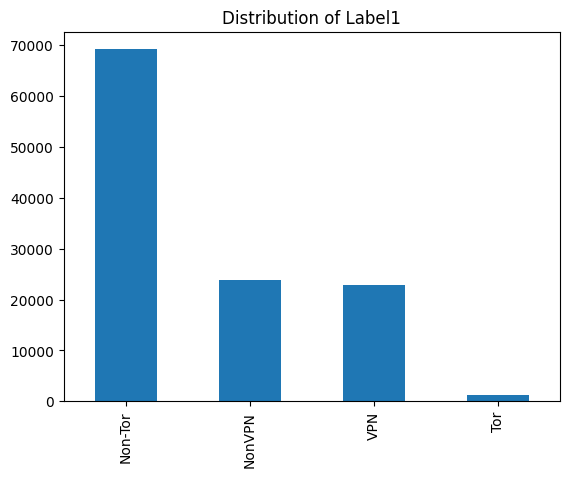

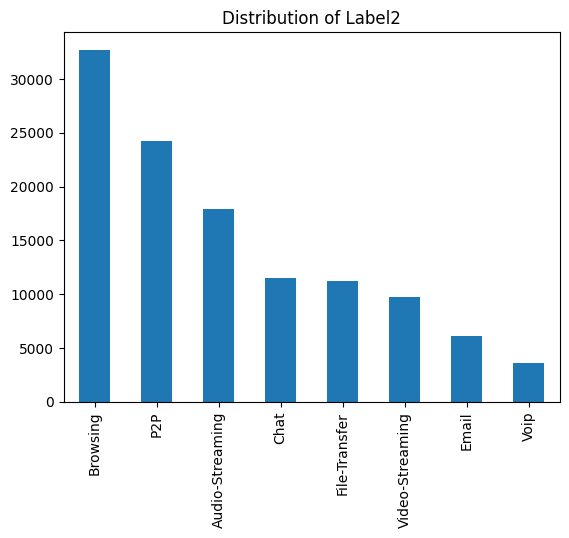

In [99]:
import matplotlib.pyplot as plt

# Plot the distribution of Label1
df['Label1'].value_counts().plot(kind='bar')
plt.title('Distribution of Label1')
plt.show()

# Plot the distribution of Label2
df['Label2'].value_counts().plot(kind='bar')
plt.title('Distribution of Label2')
plt.show()

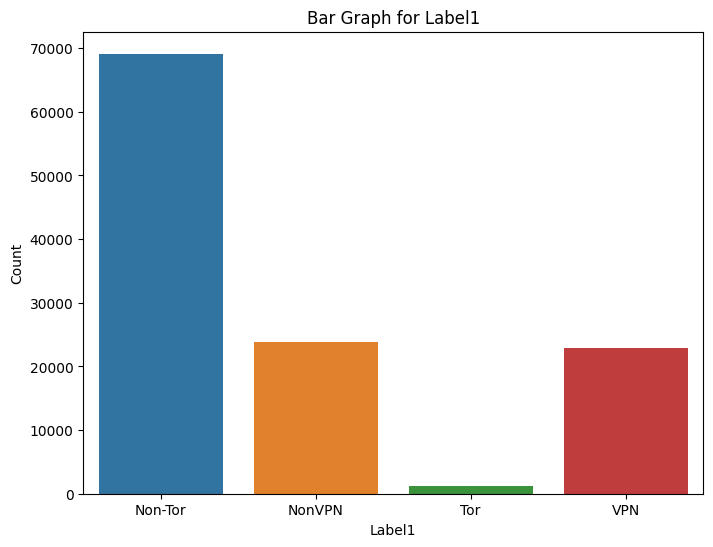

In [100]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='Label1', data=df)
plt.xlabel('Label1')
plt.ylabel('Count')
plt.title('Bar Graph for Label1')
plt.show()




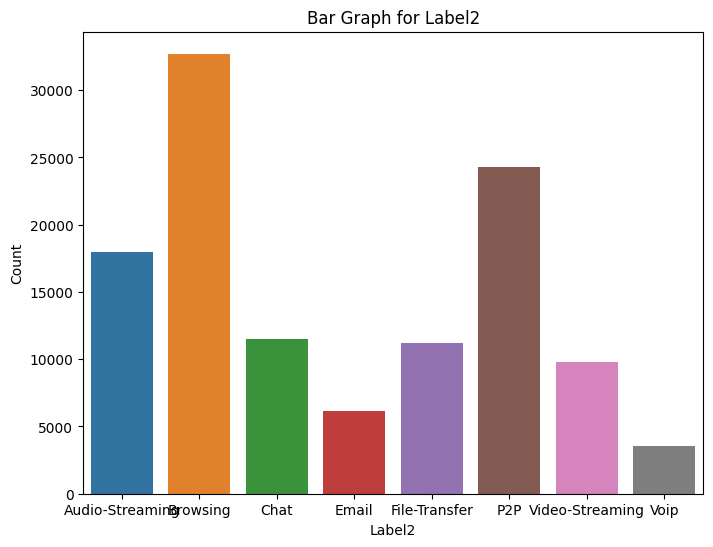

In [101]:
#bargraph for label 2
plt.figure(figsize=(8, 6))
sns.countplot(x='Label2', data=df)
plt.xlabel('Label2')
plt.ylabel('Count')
plt.title('Bar Graph for Label2')
plt.show()


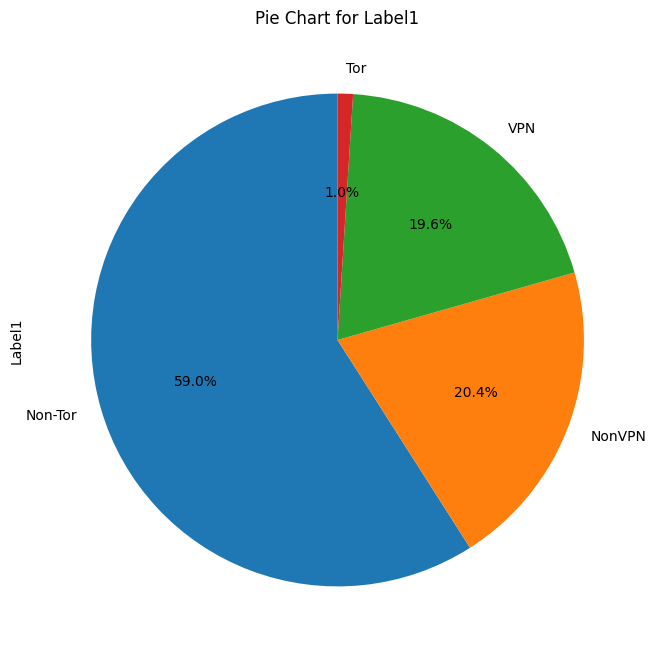

In [102]:
# Pie chart for 'Label1'
plt.figure(figsize=(8, 8))
df['Label1'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart for Label1')
plt.show()

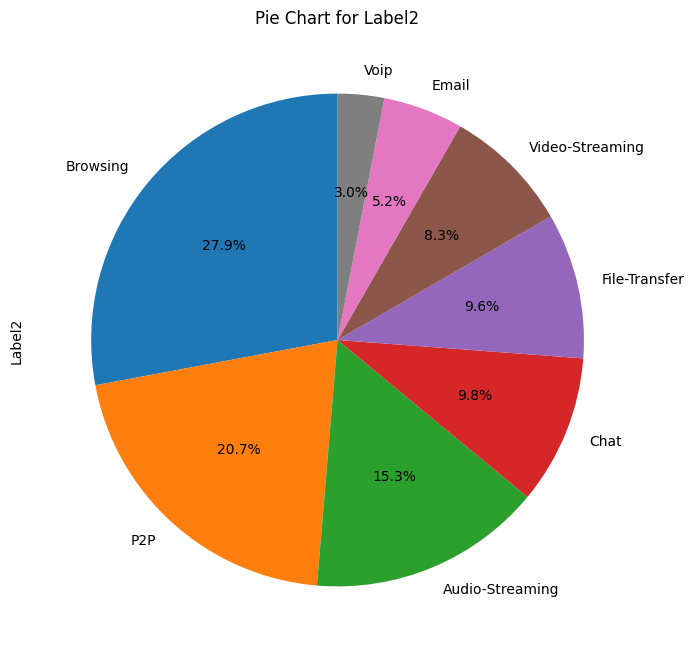

In [103]:
# Pie chart for 'Label2'
plt.figure(figsize=(8, 8))
df['Label2'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart for Label2')
plt.show()

**TIME SERIES ANALYSIS**

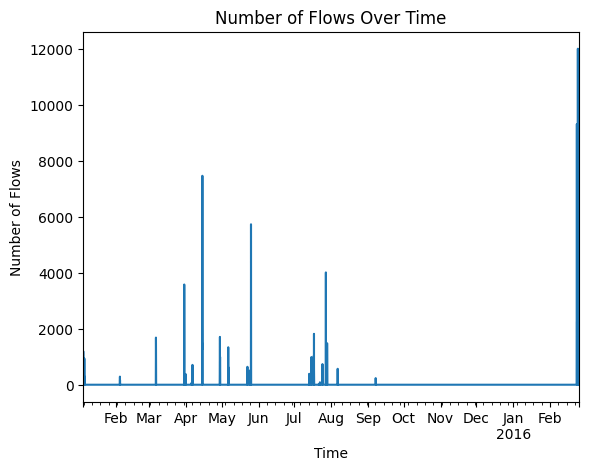

In [104]:
# Set 'Timestamp' as the index for time series analysis
df.set_index('Timestamp', inplace=True)

# Plot the number of flows over time
df.resample('H').size().plot(title='Number of Flows Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Flows')
plt.show()

2-**BIVARIATE ANALYSIS**

**BOX** **PLOTS**

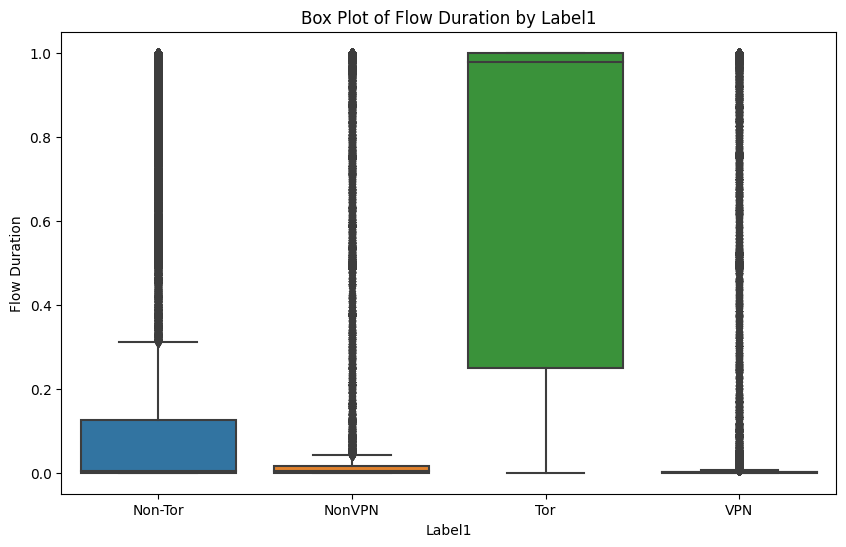

In [105]:


plt.figure(figsize=(10, 6))
sns.boxplot(x='Label1', y='Flow Duration', data=df)
plt.title('Box Plot of Flow Duration by Label1')
plt.xlabel('Label1')
plt.ylabel('Flow Duration')
plt.show()

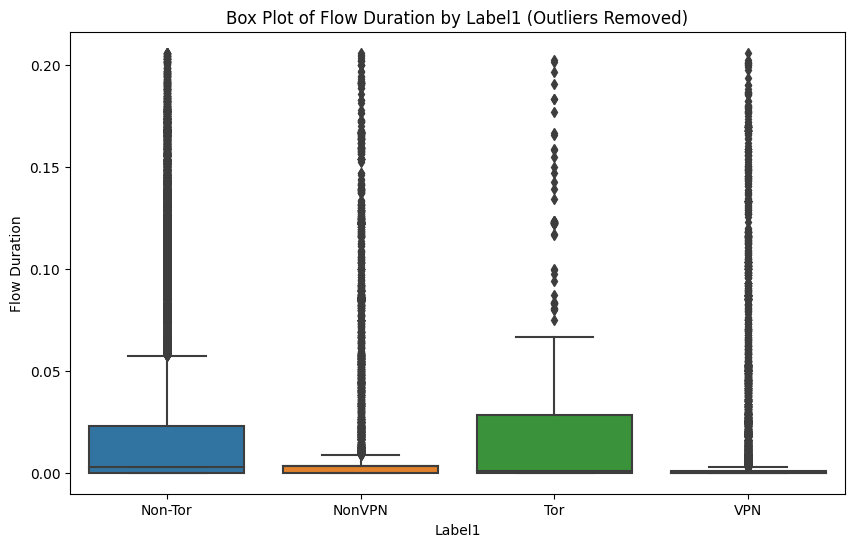

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))

# Calculate the interquartile range (IQR) for 'Flow Duration'
Q1 = df['Flow Duration'].quantile(0.25)
Q3 = df['Flow Duration'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to exclude outliers
df_no_outliers = df[(df['Flow Duration'] >= lower_bound) & (df['Flow Duration'] <= upper_bound)]

# Create a box plot with the filtered data
sns.boxplot(x='Label1', y='Flow Duration', data=df_no_outliers)
plt.title('Box Plot of Flow Duration by Label1 (Outliers Removed)')
plt.xlabel('Label1')
plt.ylabel('Flow Duration')
plt.show()

In [107]:
#handeling outliers
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR)))

# Display the indices of the rows containing outliers
outliers_rows = outliers.any(axis=1)
print("Rows with outliers:")
#print(df[outliers_rows])

Rows with outliers:


In [108]:
df_imputed = df.copy()
df_imputed[numerical_features] = np.where(outliers, df[numerical_features].median(), df[numerical_features])

BOX PLOT FOR LABEL 2

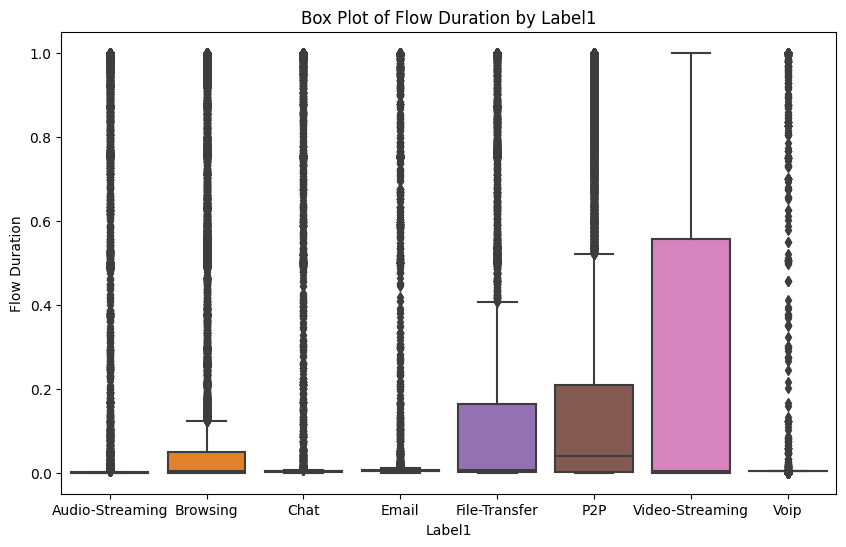

In [109]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Label2', y='Flow Duration', data=df)
plt.title('Box Plot of Flow Duration by Label1')
plt.xlabel('Label1')
plt.ylabel('Flow Duration')
plt.show()

HANDELING OUTLIERS


In [110]:
#handeling outliers
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR)))

# Display the indices of the rows containing outliers
outliers_rows = outliers.any(axis=1)
print("Rows with outliers:")
#print(df[outliers_rows])
df_imputed = df.copy()
df_imputed[numerical_features] = np.where(outliers, df[numerical_features].median(), df[numerical_features])

Rows with outliers:


3-**MULTIVARIATE ANALYSIS**

CORRELATION **ANALYSIS**

<ipython-input-111-c72147f68a08>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


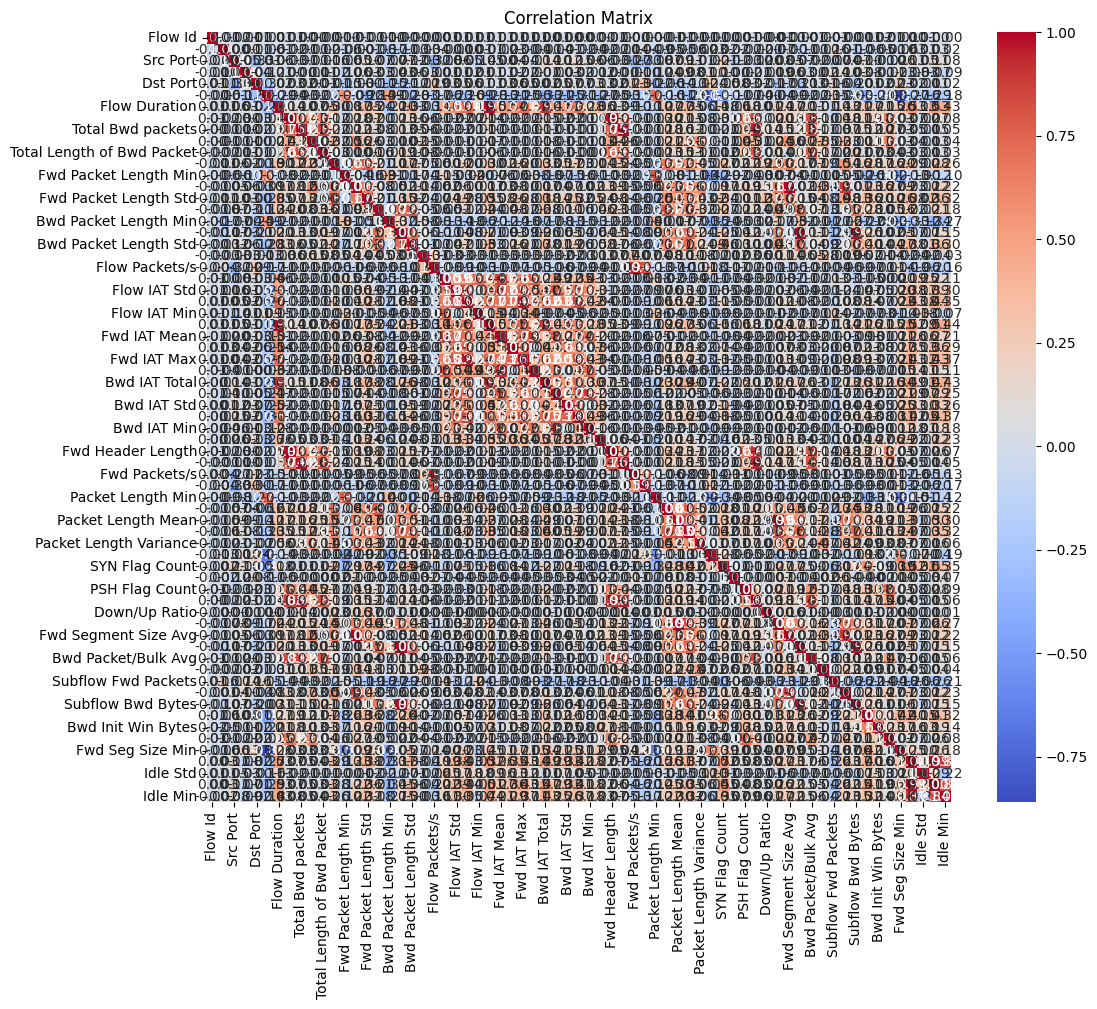

In [111]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<ipython-input-112-6e433c3b5fa5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature][df['Label1'] == label], label=f'Label1={label}', shade=True)
<ipython-input-112-6e433c3b5fa5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature][df['Label1'] == label], label=f'Label1={label}', shade=True)
<ipython-input-112-6e433c3b5fa5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature][df['Label1'] == label], label=f'Label1={label}', shade=True)
<ipython-input-112-6e433c3b5fa5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.

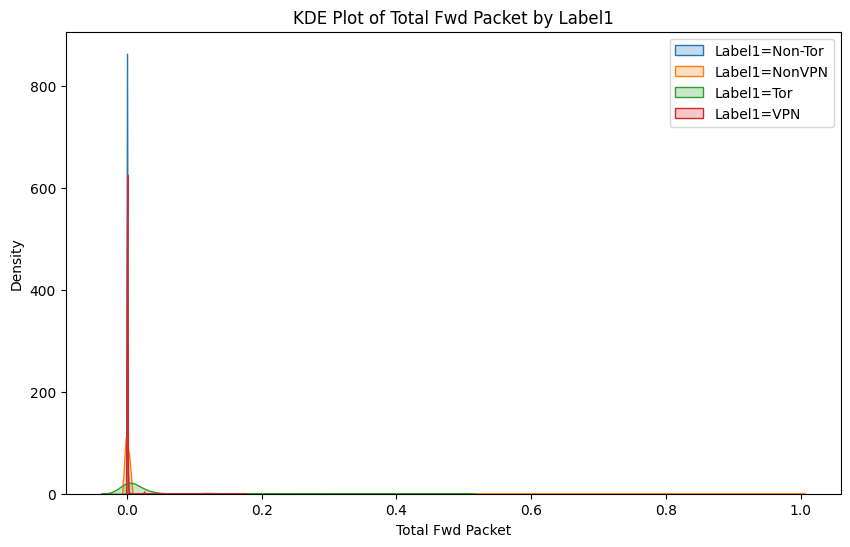

<ipython-input-112-6e433c3b5fa5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature][df['Label1'] == label], label=f'Label1={label}', shade=True)
<ipython-input-112-6e433c3b5fa5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature][df['Label1'] == label], label=f'Label1={label}', shade=True)
<ipython-input-112-6e433c3b5fa5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature][df['Label1'] == label], label=f'Label1={label}', shade=True)
<ipython-input-112-6e433c3b5fa5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.

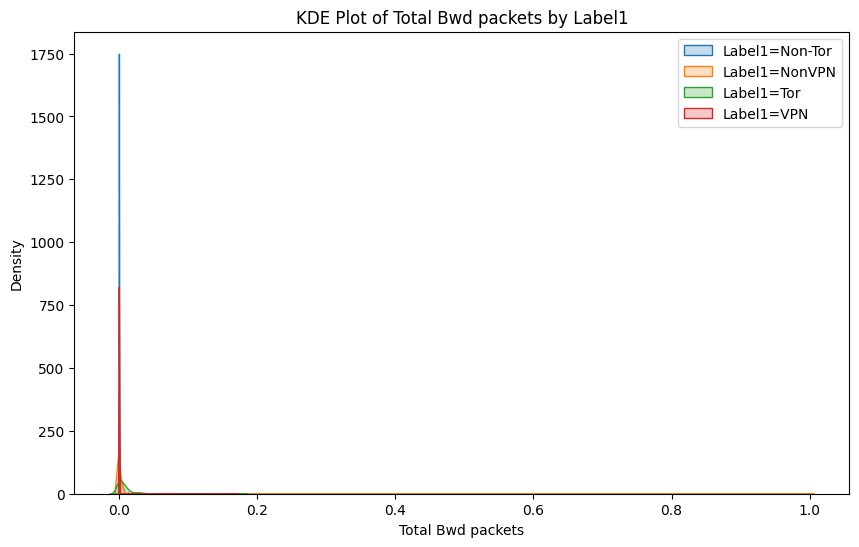

<ipython-input-112-6e433c3b5fa5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature][df['Label1'] == label], label=f'Label1={label}', shade=True)
<ipython-input-112-6e433c3b5fa5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature][df['Label1'] == label], label=f'Label1={label}', shade=True)
<ipython-input-112-6e433c3b5fa5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature][df['Label1'] == label], label=f'Label1={label}', shade=True)
<ipython-input-112-6e433c3b5fa5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.

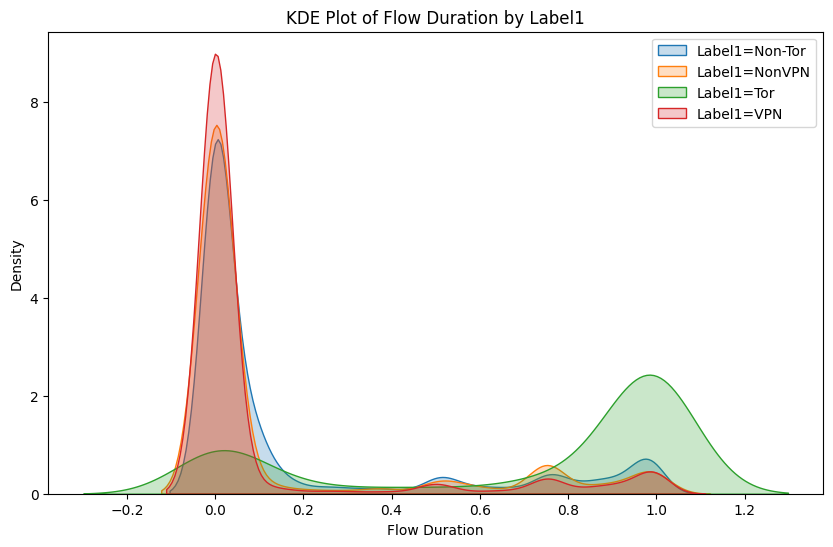

In [112]:
#  KDE plots for multiple features
selected_features = ['Total Fwd Packet', 'Total Bwd packets', 'Flow Duration']
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    for label in df['Label1'].unique():
        sns.kdeplot(df[feature][df['Label1'] == label], label=f'Label1={label}', shade=True)
    plt.title(f'KDE Plot of {feature} by Label1')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [113]:
df.head()

,Flow Id,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,...,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label1,Label2
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-07-24 16:09:48,26883,1898,57158,614,443,6,0.000002,0.000000,0.000002,0,...,1892,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming
2015-07-24 16:09:48,14406,1898,57159,614,443,6,0.000003,0.000000,0.000002,0,...,1987,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming
2015-07-24 16:09:48,53066,1898,57160,614,443,6,0.000004,0.000000,0.000002,0,...,2049,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming
2015-07-24 16:09:48,14761,1898,49134,2134,443,6,0.000003,0.000000,0.000002,0,...,2008,1047,0,20,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,Audio-Streaming
2015-07-24 16:09:45,55892,1898,34697,6400,19305,6,0.089820,0.002477,0.000850,64530,...,1382,2320,581,20,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,Audio-Streaming


<ipython-input-114-71e0eabe8de9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature][df['Label2'] == label], label=f'Label2={label}', shade=True)
<ipython-input-114-71e0eabe8de9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature][df['Label2'] == label], label=f'Label2={label}', shade=True)
<ipython-input-114-71e0eabe8de9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature][df['Label2'] == label], label=f'Label2={label}', shade=True)
<ipython-input-114-71e0eabe8de9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.

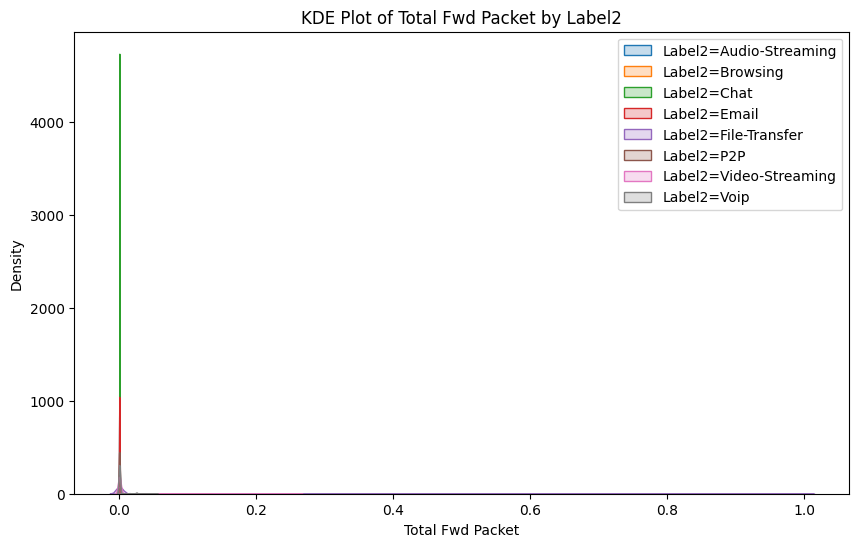

<ipython-input-114-71e0eabe8de9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature][df['Label2'] == label], label=f'Label2={label}', shade=True)
<ipython-input-114-71e0eabe8de9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature][df['Label2'] == label], label=f'Label2={label}', shade=True)
<ipython-input-114-71e0eabe8de9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature][df['Label2'] == label], label=f'Label2={label}', shade=True)
<ipython-input-114-71e0eabe8de9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.

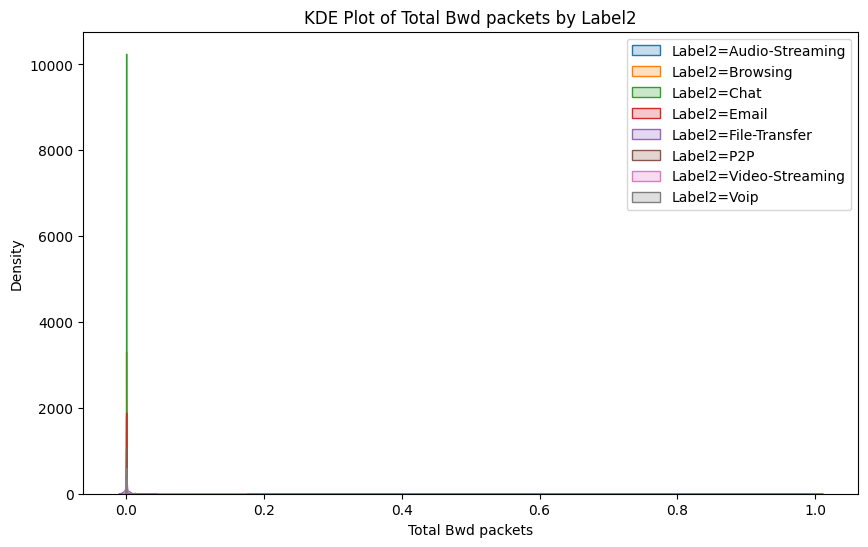

<ipython-input-114-71e0eabe8de9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature][df['Label2'] == label], label=f'Label2={label}', shade=True)
<ipython-input-114-71e0eabe8de9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature][df['Label2'] == label], label=f'Label2={label}', shade=True)
<ipython-input-114-71e0eabe8de9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature][df['Label2'] == label], label=f'Label2={label}', shade=True)
<ipython-input-114-71e0eabe8de9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.

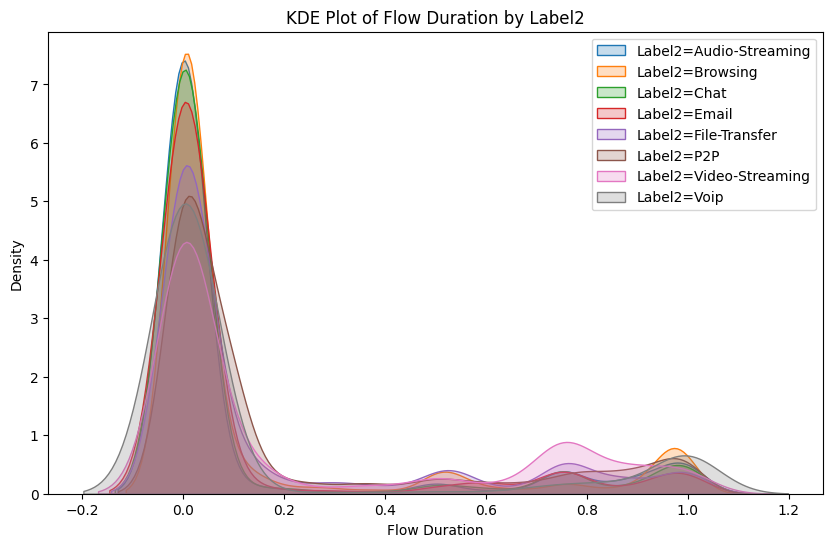

In [114]:
#  KDE plots for multiple features
selected_features = ['Total Fwd Packet', 'Total Bwd packets', 'Flow Duration']
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    for label in df['Label2'].unique():
        sns.kdeplot(df[feature][df['Label2'] == label], label=f'Label2={label}', shade=True)
    plt.title(f'KDE Plot of {feature} by Label2')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

**MACHINE LEARNING MODEL**

In [115]:
#IMPORTING ALL LIBRARIES NEEDED TO BUILD MODEL.
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

In [116]:
print(df.isin([np.inf, -np.inf]).sum())

Flow Id     0
Src IP      0
Src Port    0
Dst IP      0
Dst Port    0
           ..
Idle Std    0
Idle Max    0
Idle Min    0
Label1      0
Label2      0
Length: 69, dtype: int64


***SAMPLING*** **DATA**

In [117]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
X = df.drop(['Label1', 'Label2'], axis=1)  # Exclude target variables

y = df['Label1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Resample the training data using Random Over-Sampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

**RANDOM FOREST**

In [126]:
df = df.applymap(lambda x: round(x, 4))

In [127]:
first_row_values = df.iloc[8].values

# Print the values of the first row
print(first_row_values)

[4.71650000e+04 3.04000000e+03 4.43000000e+02 3.48600000e+03
 4.40970000e+04 6.00000000e+00 8.35700000e-01 3.00000000e-04
 1.00000000e-04 1.45260000e+04 1.78700000e+04 1.55000000e-02
 0.00000000e+00 2.38131100e+02 3.24805500e+02 3.03000000e-02
 0.00000000e+00 2.97833300e+02 4.79241900e+02 3.23057200e+02
 1.20660000e+00 8.35662108e+05 4.00383879e+06 2.90697080e+07
 7.00000000e+00 8.35700000e-01 1.39000000e-02 6.56000000e-02
 2.90697080e+07 1.20000000e+01 8.35300000e-01 1.42000000e-02
 6.62000000e-02 2.91092910e+07 3.00000000e+01 1.00000000e+00
 3.00000000e-04 1.00000000e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.46000000e+03 2.69516400e+02 4.06915800e+02
 1.65580500e+05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.40000000e+01 1.21000000e+02 0.00000000e+00 2.71743800e+02
 2.38131100e+02 2.97833300e+02 1.10000000e+01 4.30000000e+03
 0.00000000e+00 1.20000000e+02 1.47000000e+02 2.64000000e+03
 3.34600000e+03 3.10000000e+01 2.00000000e+01 1.43777000e+15
 3.32778970e+07 1.437770

In [128]:
import pandas as pd
import numpy as np


# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)



In [129]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Example: Min-Max Scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

RANDOM FOREST

In [130]:
X = df.drop(['Label1', 'Label2'], axis=1)  # Exclude target variables

y = df['Label1']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_1 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9959837641529588
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13921
           1       0.99      0.99      0.99      4721
           2       1.00      0.90      0.95       223
           3       0.99      0.99      0.99      4540

    accuracy                           1.00     23405
   macro avg       0.99      0.97      0.98     23405
weighted avg       1.00      1.00      1.00     23405



RANDOM FOREST FOR LABEL 2

In [131]:
X = df.drop(['Label1', 'Label2'], axis=1)  # Exclude target variables

y = df['Label2']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_1 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9959837641529588
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      3586
           1       0.94      0.98      0.96      6578
           2       0.85      0.83      0.84      2210
           3       0.81      0.79      0.80      1209
           4       0.91      0.86      0.88      2268
           5       0.99      1.00      0.99      4904
           6       0.79      0.77      0.78      1963
           7       0.80      0.84      0.81       687

    accuracy                           0.91     23405
   macro avg       0.88      0.87      0.87     23405
weighted avg       0.91      0.91      0.91     23405



DECISION TREE FOR LABEL 2

In [132]:
from sklearn.tree import DecisionTreeClassifier
X = df.iloc[:, :-2]
y = df.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9959837641529588

Confusion Matrix:
[[3224   34    8    3   39   10  262    6]
 [  24 6235   21    2  173    4  119    0]
 [   9   10 1912  147   26    1    6   99]
 [   3    1  117 1076    2    1    2    7]
 [  38  166   27   10 1947    4   60   16]
 [   8   12    0    0    6 4876    2    0]
 [ 287  113   17    0   51    2 1488    5]
 [   3    0  121   18   16    0    9  520]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3586
           1       0.95      0.95      0.95      6578
           2       0.86      0.87      0.86      2210
           3       0.86      0.89      0.87      1209
           4       0.86      0.86      0.86      2268
           5       1.00      0.99      0.99      4904
           6       0.76      0.76      0.76      1963
           7       0.80      0.76      0.78       687

    accuracy                           0.91     23405
   macro avg       0.87      0.87      0.

DECISION TREE FOR LABEL 1

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


X = df.iloc[:, :-2]  # Exclude the last two columns
y = df.iloc[:, -2]    # Use the second last column as the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy_2 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9967101046784875

Confusion Matrix:
[[13920     1     0     0]
 [    6  4677    20    18]
 [    2    11   210     0]
 [    2    16     1  4521]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13921
           1       0.99      0.99      0.99      4721
           2       0.91      0.94      0.93       223
           3       1.00      1.00      1.00      4540

    accuracy                           1.00     23405
   macro avg       0.97      0.98      0.98     23405
weighted avg       1.00      1.00      1.00     23405



SVM

In [134]:
from sklearn.svm import SVC
X = df.iloc[:, :-2]
y = df.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier
clf = SVC(kernel='rbf', random_state=42)  # You can choose different kernel functions


clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy3 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9967101046784875

Confusion Matrix:
[[2905  126   78   10   49   31  383    4]
 [  12 6304    5    7  142   55   51    2]
 [  60   55 1594  344   44   20   82   11]
 [  24   62  419  632   37   11   18    6]
 [ 110  532   78   22 1310   60  150    6]
 [   4   82    5    1    8 4801    2    1]
 [ 337  449   82    7   90   13  983    2]
 [  20   15  495   36    3    1   19   98]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      3586
           1       0.83      0.96      0.89      6578
           2       0.58      0.72      0.64      2210
           3       0.60      0.52      0.56      1209
           4       0.78      0.58      0.66      2268
           5       0.96      0.98      0.97      4904
           6       0.58      0.50      0.54      1963
           7       0.75      0.14      0.24       687

    accuracy                           0.80     23405
   macro avg       0.74      0.65      0.

SVM FOR LABEL 1

In [135]:
from sklearn.svm import SVC
X = df.iloc[:, :-2]
y = df.iloc[:, -2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier
clf = SVC(kernel='rbf', random_state=42)  # You can choose different kernel functions


clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy_3 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9663747062593463

Confusion Matrix:
[[13866    37     0    18]
 [   62  4361     2   296]
 [    0    39   179     5]
 [   70   258     0  4212]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13921
           1       0.93      0.92      0.93      4721
           2       0.99      0.80      0.89       223
           3       0.93      0.93      0.93      4540

    accuracy                           0.97     23405
   macro avg       0.96      0.91      0.93     23405
weighted avg       0.97      0.97      0.97     23405



**KNN ALGORITHM**

In [136]:
from sklearn.neighbors import KNeighborsClassifier
X = df.iloc[:, :-2]
y = df.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose a different number of neighbors

# Train the classifier
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy4 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("KNN Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

KNN Accuracy: 0.9663747062593463

Confusion Matrix:
[[3009  100   42    4   54   28  344    5]
 [  37 6250    9    6  173   30   72    1]
 [  31   50 1634  241   38   20   28  168]
 [  10   46  309  778   14    7   10   35]
 [  52  433   68   18 1527   40  110   20]
 [  11  109    2    0   13 4762    6    1]
 [ 340  339   56   10  113   15 1090    0]
 [   7    7  194   25    6    0    9  439]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3586
           1       0.85      0.95      0.90      6578
           2       0.71      0.74      0.72      2210
           3       0.72      0.64      0.68      1209
           4       0.79      0.67      0.73      2268
           5       0.97      0.97      0.97      4904
           6       0.65      0.56      0.60      1963
           7       0.66      0.64      0.65       687

    accuracy                           0.83     23405
   macro avg       0.78      0.75    

KNN FOR LABEL 1

In [137]:
from sklearn.neighbors import KNeighborsClassifier
X = df.iloc[:, :-2]
y = df.iloc[:, -2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose a different number of neighbors

# Train the classifier
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy_4 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("KNN Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

KNN Accuracy: 0.9779107028412732

Confusion Matrix:
[[13898     8     0    15]
 [   69  4452     7   193]
 [    2    25   191     5]
 [   89   102     2  4347]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13921
           1       0.97      0.94      0.96      4721
           2       0.95      0.86      0.90       223
           3       0.95      0.96      0.96      4540

    accuracy                           0.98     23405
   macro avg       0.97      0.94      0.95     23405
weighted avg       0.98      0.98      0.98     23405



LOGISTIC REGRESSION WITH LABEL 2


In [138]:
from sklearn.linear_model import LogisticRegression
X = df.iloc[:, :-2]  # Exclude the last two columns
y = df.iloc[:, -1]    # Use the last column as the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Logistic Regression classifier
clf = LogisticRegression(random_state=42)

clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy5 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9779107028412732

Confusion Matrix:
[[2707  328  124   15   96   92  218    6]
 [  34 6138   33   27   72  230   42    2]
 [ 247  143 1433   42   36   61   67  181]
 [ 106  153  644  127   50   36   22   71]
 [ 216  947   72   20  674  203  126   10]
 [  19  409   64   30   34 4340    8    0]
 [ 538  618   78   21   92   86  524    6]
 [  29   35  338   11   14   10   16  234]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      3586
           1       0.70      0.93      0.80      6578
           2       0.51      0.65      0.57      2210
           3       0.43      0.11      0.17      1209
           4       0.63      0.30      0.40      2268
           5       0.86      0.88      0.87      4904
           6       0.51      0.27      0.35      1963
           7       0.46      0.34      0.39       687

    accuracy                           0.69     23405
   macro avg       0.60      0.53      0.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LOGISTIC REGRESSION WITH LABEL 1

In [139]:
X = df.iloc[:, :-2]  # Exclude the last two columns
y = df.iloc[:, -2]    # Use the last column as the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Logistic Regression classifier
clf = LogisticRegression(random_state=42)

clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy_5 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9020722067934203

Confusion Matrix:
[[13698   197     2    24]
 [  550  3480    15   676]
 [    6    38   159    20]
 [  359   403     2  3776]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     13921
           1       0.85      0.74      0.79      4721
           2       0.89      0.71      0.79       223
           3       0.84      0.83      0.84      4540

    accuracy                           0.90     23405
   macro avg       0.88      0.82      0.84     23405
weighted avg       0.90      0.90      0.90     23405



**NAIVE** **BAYES**

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming your data is in a DataFrame called df
# Replace df with your actual DataFrame name

# Split the dataset into features (X) and target variable (y)
X = df.iloc[:, :-2]  # Features are all columns except the last one
y = df.iloc[:, -1]   # Target variable is the last column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy6 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Naive Bayes Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Naive Bayes Accuracy: 0.9020722067934203

Confusion Matrix:
[[2671   73    0    0    0  842    0    0]
 [2747  781    0    0    0 3050    0    0]
 [1763  121    0    0    0  326    0    0]
 [ 879   59    0    0    0  271    0    0]
 [1069  155    0    0    0 1044    0    0]
 [1704  544    0    0    0 2656    0    0]
 [1041  123    0    0    0  799    0    0]
 [ 554    8    0    0    0  125    0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.74      0.33      3586
           1       0.42      0.12      0.19      6578
           2       0.00      0.00      0.00      2210
           3       0.00      0.00      0.00      1209
           4       0.00      0.00      0.00      2268
           5       0.29      0.54      0.38      4904
           6       0.00      0.00      0.00      1963
           7       0.00      0.00      0.00       687

    accuracy                           0.26     23405
   macro avg       0.12      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP CLASSIFIER

**COMPAIRING** **MODELS**

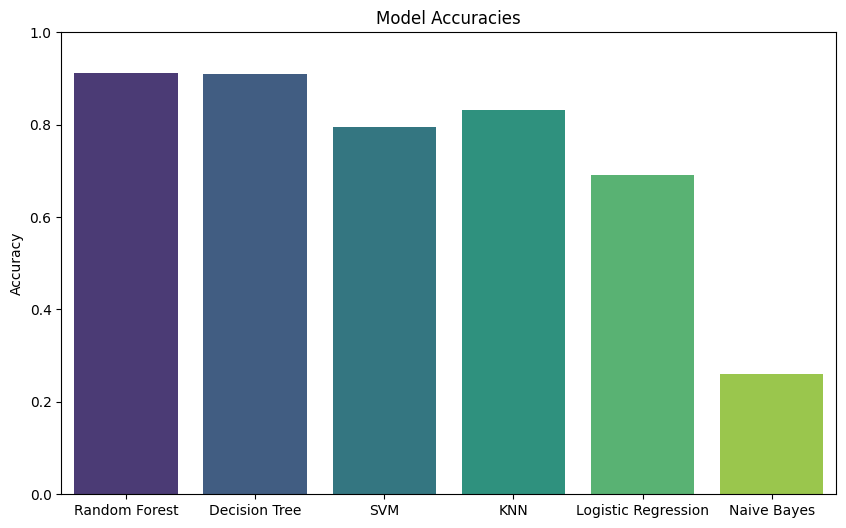

In [141]:
#for label 2
import matplotlib.pyplot as plt
import seaborn as sns

# Replace these with your actual accuracy values
model_names = ['Random Forest', 'Decision Tree', 'SVM','KNN','Logistic Regression','Naive Bayes']
accuracies = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5,accuracy6]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Accuracies')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for accuracy scale
plt.ylabel('Accuracy')
plt.show()

**CONCLUSION**
